<a href="https://colab.research.google.com/github/EjazAlam9006/play-store-app-reveiw-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##Importing Important Libraries

In [2]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##Mounting and Reading Csv file of Google Play Store Application Dataset

In [3]:
#Mounting File
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#Reading Csv file
dir = '/content/drive/MyDrive/Almabetter Data /Capstone Projects Dataset/Capstone Project 1/Google Play Store Application/'
play_store_app_df =pd.read_csv(dir + 'Play Store Data.csv')
user_reviews_df = pd.read_csv('/content/drive/MyDrive/Almabetter Data /Capstone Projects Dataset/Capstone Project 1/Google Play Store Application/ User Reviews.csv')

In [5]:
#making a copy of original Play store data to df
df = play_store_app_df.copy()

#Checking Basic Composition of Play Store Dataset

---



In [6]:
#To get the contents of columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#to get the number of Rows and Columns
df.shape

(10841, 13)

In [8]:
#to get the overview of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
#Descriptive statistics
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#Checking Data Components of User Reviews Dataset


---

In [10]:
#making a copy of user reviews dataset to ur_df
ur_df= user_reviews_df.copy()

In [11]:
#To get the contents of columns
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [12]:
#to get the number of Rows and Columns
ur_df.shape

(64295, 5)

In [13]:
#to get the overview of dataset
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


##Data Cleaning of Play Store Dataset

---

In [14]:
#Checking for Duplicate entries of a single application
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [15]:
#removing duplicate entries with exact similarities
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [16]:
df['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

In [17]:
#df_new[df_new['App'] == 'Duolingo: Learn Languages Free']
df[df['App'] == 'Candy Crush Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


As we can notice that a single application has more duplicate applications  with different number of reviews and with different Categories.

In [18]:
#dropping all the duplicates of an app and keeping the first entry of the app 
df.drop_duplicates(subset=['App'],keep='first',inplace=True,ignore_index=True)
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [20]:
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [21]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [22]:
#removing data with improper entry of Category
df.drop(9300,axis=0,inplace=True)
df.reset_index(inplace=True)
df['Category'].value_counts()


FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [24]:

df[df['Type'].isnull()]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,8028,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [25]:
#dropping useless data
df.drop(8028,axis=0,inplace=True)

In [26]:
#dropping index column and removing '$' sign from ['Price']
df.drop(columns=['index'],axis=0,inplace=True)
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9650 non-null   object 
 12  Android Ver     9656 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [28]:
#Checking null values of 'Current Ver' and 'Android Ver' columns
df[df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,BT Master,FAMILY,NaN,0,222k,100+,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [29]:
#Setting the null values of columns 'Current Ver' and 'Android Ver' as 'Missing'
df['Current Ver'].fillna('Missing',inplace=True)
df['Android Ver'].fillna('Missing',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9658 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [30]:
#Replacing NaN values of Rating to mean of Rating
df.loc[df['Rating'].isna(),'Rating'] = df.loc[~df['Rating'].isna(),'Rating'].mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9658 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [31]:
# Removing '+' & ',' from ['Installs'] and converting object data of 
df['Installs'] = df['Installs'].apply(lambda x: x.rstrip('+'))
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',''))
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9658 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [33]:
#Checking the number of apps in Free and Paid type
app_type_df=df['Type'].value_counts()
app_type_df


Free    8902
Paid     756
Name: Type, dtype: int64

#Data Cleaning of User Reviews Dataset

---

In [34]:
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [36]:
#droping null values
ur_df.dropna(subset= ['Sentiment'], inplace=True)
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [ ]:
#dropping [Translated_Review] column as it is of no use

In [38]:
ur_df.drop(['Translated_Review'],axis=1,inplace =True)


KeyError: ignored

In [39]:
ur_df.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000


Here we can see that most of the apps (92%) are free and only 8% of apps are paid.

#Merging Play Store  and User Reviews Dataframes


---

In [47]:
merged_df = df.merge(ur_df, on="App")

In [48]:
merged_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Positive,0.433333,0.466667


In [49]:
#Checking for Duplicate values
merged_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35929    False
35930    False
35931     True
35932     True
35933    False
Length: 35934, dtype: bool

#Question 1: What percentage of apps are paid and free?

---

In [50]:
#Checking the number of apps in Free and Paid type
app_type_df=df['Type'].value_counts()
app_type_df


Free    8902
Paid     756
Name: Type, dtype: int64

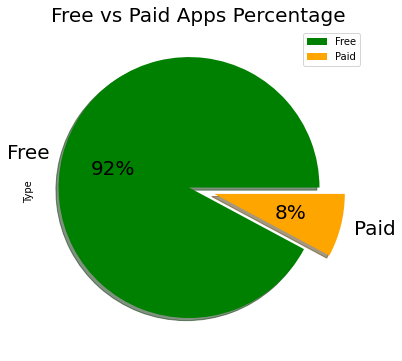

In [51]:
#Plotting pie chart of free vs paid apps

plt.rcParams['figure.figsize']=(6,6)
type_pie=app_type_df.plot(kind='pie',autopct='%1.0f%%',fontsize=20,shadow=True, colors=['green','orange'],explode=(0.10,0.10))
type_pie.set_title("Free vs Paid Apps Percentage ",fontsize=20)
plt.legend()

Here we can see that most of the apps (92%) are free and only 8% of apps are paid.

#Question 2: Count of apps in each category differentiated by its type (Free/Paid)


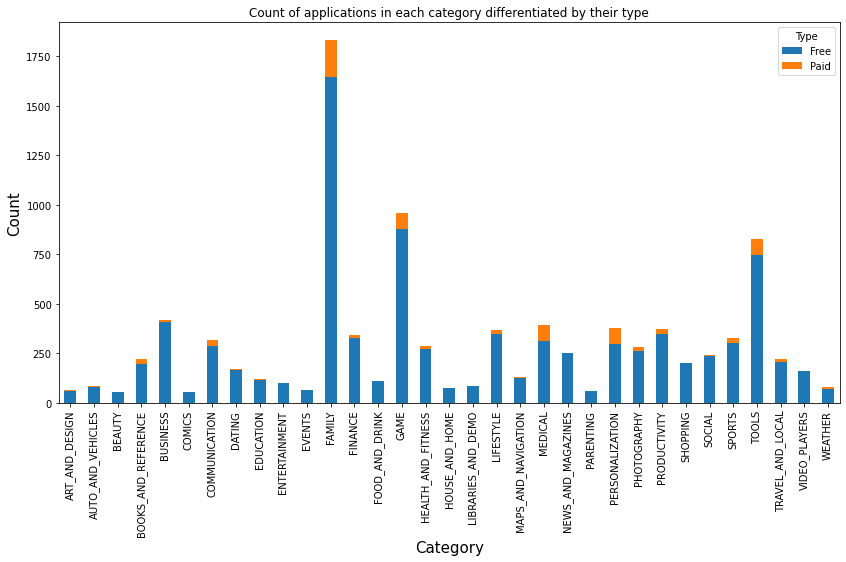

In [52]:
#plotting the bar graph 
app_count = df.groupby(['Category','Type'])[['App']].count().reset_index().rename(columns={'App':'Count','index':'App'})
df_app_count = app_count.pivot('Category', 'Type', 'Count').fillna(0).reset_index()

df_app_count.set_index('Category').plot(kind='bar', stacked=True, figsize=(14,7))
plt.xlabel("Category", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.title("Count of applications in each category differentiated by their type")
plt.show()

It looks like certain app categories have more free apps available for download than others. In our dataset, the majority of apps in Family, Games, Tools and Business are Free. At the same time Family, Medical, Games, Personalization and Tools had the biggest number of paid apps available for download.

In [53]:
#In general
x=df['Category'].value_counts()
y=df['Category'].value_counts().index
print(x)
print(y)


FAMILY                 1831
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64
Index(['FAMILY', 'GAME', 'TOOLS', 'BUSINESS', '

Text(0.5, 1.0, 'Category Wise Count of Apps on Google Playstore')

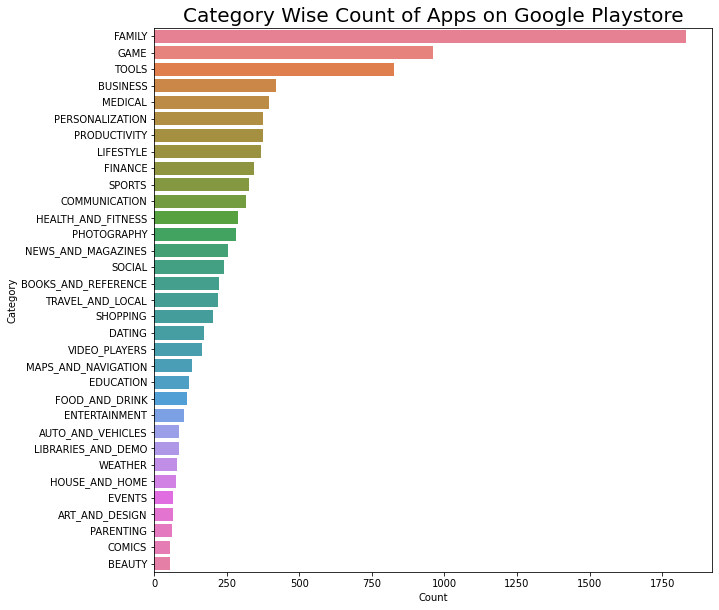

In [54]:
xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,10))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Category Wise Count of Apps on Google Playstore", fontsize = 20)

Here we can see that Family category has the most no. of apps followed by Games , Tools and Business.

In [55]:
#For Free Apps
#We create a new dataframe which contains data of only free apps
free_apps_df=df[df['Type']=='Free']
free_apps_df.shape


(8902, 14)

Here we can see that Family category has the most no. of Free apps followed by Games , Tools and Business .

In [56]:
#For Paid Apps
#We create a new dataframe which contains data of only paid apps
paid_apps_df=df[df['Type']=='Paid']
paid_apps_df.shape

(756, 14)

Here we can see that Family category has the most no. of Paid apps, but it is followed by Medical, Game, Personalization, and Tools, which has approx same no of apps .

#Question 3: Average Rating of Free and paid apps.

---


We plotted the probablity distribution graph for ratings of Free and Paid apps.


In [57]:
#For Free Apps
free_apps_df['Rating'].mean()


4.167383553073272

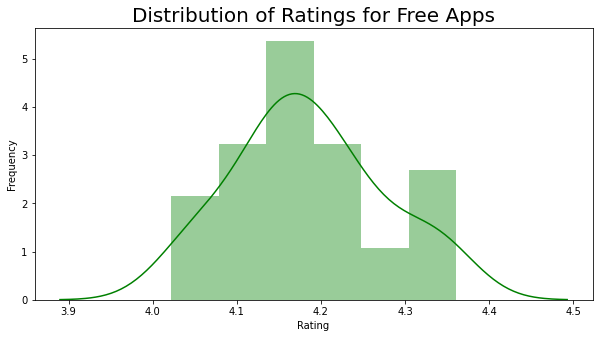

In [58]:
#Creating free app rating data frame
free_app_ratings_df = free_apps_df.groupby(['Category'])[['Rating']].mean()

#plotting the distribution graph
plt.figure(figsize=(10,5))
g = sns.distplot(free_app_ratings_df.Rating, color="Green",hist=True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Ratings for Free Apps',size = 20)
plt.show()

In [59]:
#For paid apps
paid_apps_df['Rating'].mean()


4.242239342458961

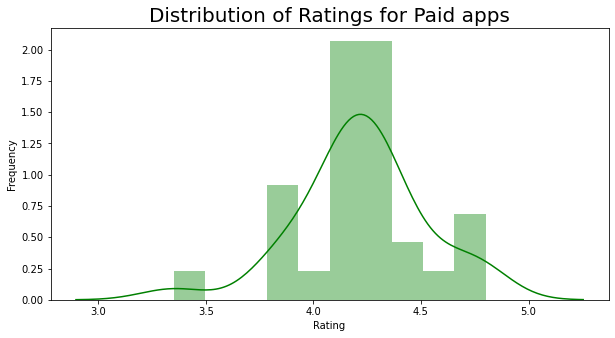

In [60]:
#Creating paid app rating data frame
paid_app_ratings_df = paid_apps_df.groupby(['Category'])[['Rating']].mean()

#plotting the distribution graph
plt.figure(figsize=(10,5))
g = sns.distplot(paid_app_ratings_df.Rating, color="Green",hist=True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Ratings for Paid apps',size = 20)
plt.show()

Here we can see that the average ratings of free apps as approx 4.1 out of 5 and for paid apps it is approx 4.2 out of 5. Thus we can conclude that paid apps are slightly better rated as compared to free apps.

#Question 4: Compairing no. of Installs and no. of apps available by its Content Rating

In [62]:
#Checking the number of apps in dataframe as per its content
df['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Wise Count of Apps on Google Playstore')

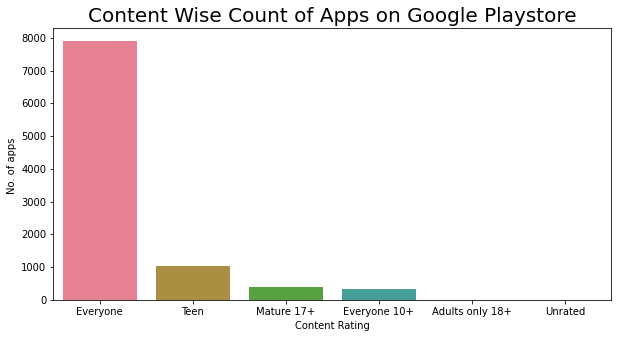

In [63]:
#Plotting the bar plot 
y=df['Content Rating'].value_counts()             #It gives series
x=df['Content Rating'].value_counts().index       #it gives index of that series


xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,5))
plt.xlabel("Content Rating")
plt.ylabel("No. of apps ")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Content Wise Count of Apps on Google Playstore", fontsize = 20)

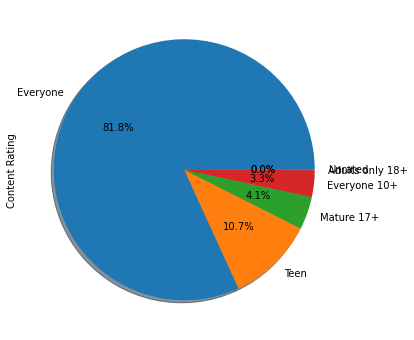

In [64]:
#Plotting pie chart for Content Rating based on no of apps availabe
y.plot(kind='pie', autopct='%0.01f%%',shadow=True)

There are majority of apps available for Everyone followed by 10.7% of apps for Teens , 4% for Mature 17+ and 3.3% for 10+.

And there are very few apps available for Adults 18+ and Unrated.

We can notice that there are only 10.7% apps available for Teens but it accounts for 21% of total app installs, hence it is evident that demand of apps for Teens is very high.


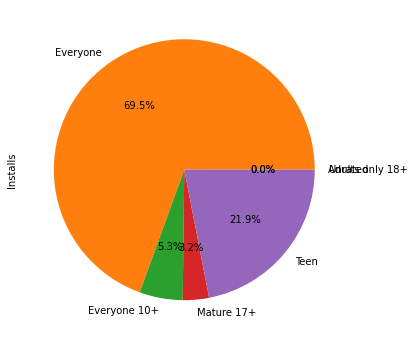

In [65]:
#Plotting pie chart for Content Rating based on no. of installations of apps

content_df=df.groupby('Content Rating')['Installs'].sum()

content_df.plot(kind='pie',autopct='%0.01f%%')



In [66]:
#Checking the number of apps in free apps dataframe as per its content
free_apps_df['Content Rating'].value_counts()


Everyone           7248
Teen                984
Mature 17+          375
Everyone 10+        290
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Wise Count of Free Apps on Google Playstore')

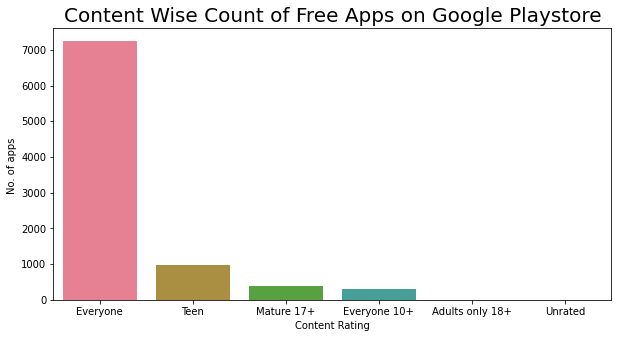

In [67]:
#Plotting the bar plot 
y=free_apps_df['Content Rating'].value_counts()             #It gives series
x=free_apps_df['Content Rating'].value_counts().index       #it gives index of that series


xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,5))
plt.xlabel("Content Rating")
plt.ylabel("No. of apps ")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Content Wise Count of Free Apps on Google Playstore", fontsize = 20)

In [68]:
#Checking the number of apps in paid apps dataframe as per its content
paid_apps_df['Content Rating'].value_counts()

Everyone        655
Teen             52
Everyone 10+     31
Mature 17+       18
Name: Content Rating, dtype: int64

Text(0.5, 1.0, 'Content Wise Count of paid Apps on Google Playstore')

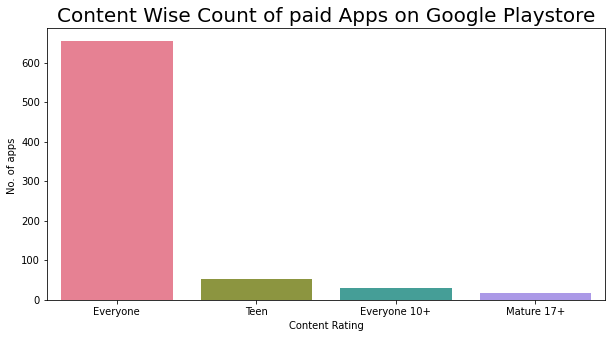

In [69]:
#Plotting the bar plot 
y=paid_apps_df['Content Rating'].value_counts()             #It gives series
x=paid_apps_df['Content Rating'].value_counts().index       #it gives index of that series


xsis=[]
ysis=[]

for i in range(len(x)):
  xsis.append(x[i])
  ysis.append(y[i])

plt.figure(figsize=(10,5))
plt.xlabel("Content Rating")
plt.ylabel("No. of apps ")

graph = sns.barplot(x = xsis, y = ysis, palette= "husl")
graph.set_title("Content Wise Count of paid Apps on Google Playstore", fontsize = 20)